# Input
This file visualizes the features that score highest in the experiment for a given model-method-classes combination. A visualization like this helps us to quickly see which features work best for a given combination and therefore are valuable to have.

In [1]:
# Importing libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Generate the Dataframe

models = ['Decision_Tree', 'Logistic_Regression', 'MLP_Classifier', 'Random_Forest_Classifier']
methods = ['Cluster-based_Oversampling_SMOTE', 'No-balancing', 'Random-oversampling', 'SMOTE']
PATH = '/datc/nano/notebooks/Results/DataFrames/Mean error/'

# Initiate df
df = pd.DataFrame(columns = ['Model', 'Method'])

# Make complete df
for model in models:
    for method in methods:
        df = df.append(pd.read_csv(PATH + f'{model}-{method}.csv'))
        
        # Filling in model and method values
        df['Model'] = df['Model'].fillna(model)
        df['Method'] = df['Method'].fillna(method)

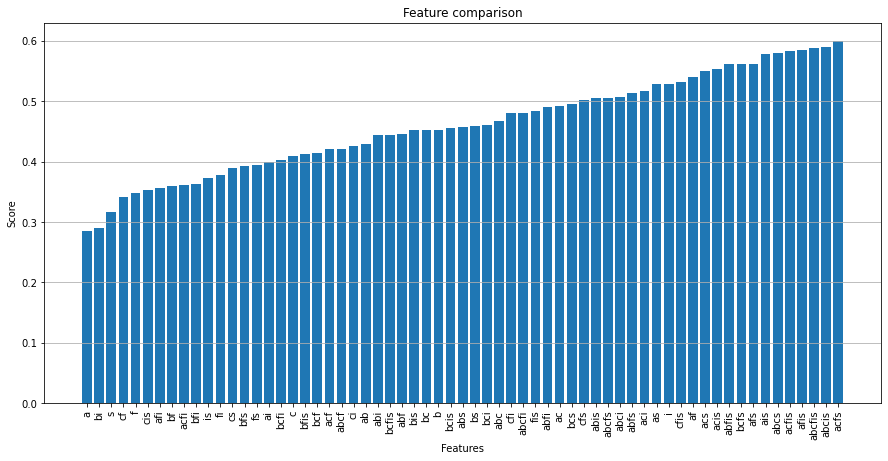

In [7]:
# CHANGE HERE
model = df['Model']== 'MLP_Classifier' 
method = df['Method']== 'Random-oversampling' 
scores = df['score_type']== 'precision' 
n_classes = "n_classes=3" 
features = "features_used"

# Axis values 
scores_plot = df[scores & model & method][n_classes]
features_plot = df[scores & model & method][features]

# Sort data
data_plot = [(y, x) for y, x in zip(scores_plot, features_plot)]
data_plot.sort()
y, x = zip(*data_plot)

# Plot
plt.figure(figsize= (15,7))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.grid(True, axis= 'y')
plt.title('Feature comparison')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

# Code to insert into joint document
To use this visualization in our joint file with a dictionary of dataframes instead of one single dataframe, I changed my code to this:

In [8]:
# Generate the Dictionary containing all the dataframes

models = ['Decision_Tree', 'Logistic_Regression', 'MLP_Classifier', 'Random_Forest_Classifier']
methods = ['Cluster-based_Oversampling_SMOTE', 'No-balancing', 'Random-oversampling', 'SMOTE']

PATH = '/datc/nano/notebooks/Results/DataFrames/Power scaler/'

# Init dict
df_dict = {}

for model in models:
    for method in methods:
        # Import Dataframe
        df = pd.read_csv(PATH + f'{model}-{method}.csv', index_col= ('score_type', 'features_used'))
        
        # Save Dataframe to dict
        if model in df_dict:
            df_dict[model][method] = df
        else:
            df_dict[model]={method: df}
    

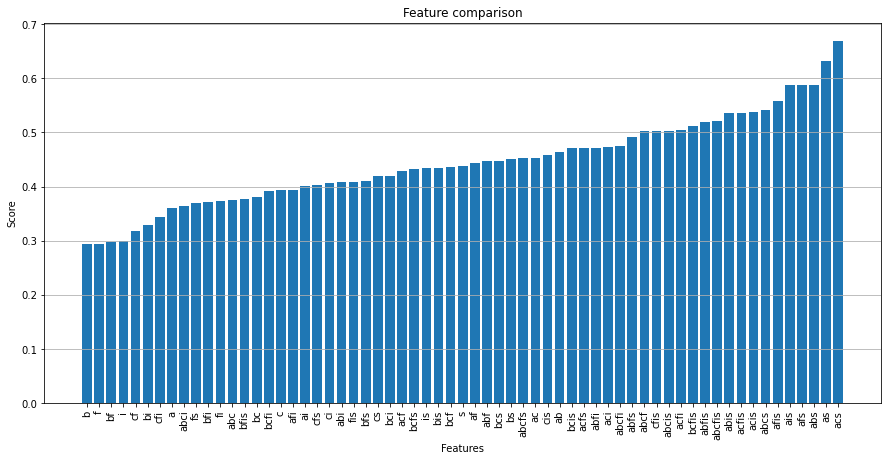

In [9]:
# CHANGE HERE
model = 'MLP_Classifier' 
method = 'Random-oversampling' 
scores = 'precision' 
n_classes = "n_classes=3" 
features = "features_used"

# Axis values 
scores_plot = df_dict[model][method][n_classes].loc[scores]
features_plot = df_dict[model][method].loc[scores].index

# Sort data
data_plot = [(y, x) for y, x in zip(scores_plot, features_plot)]
data_plot.sort()
y, x = zip(*data_plot)

# Plot
plt.figure(figsize= (15,7))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.grid(True, axis= 'y')
plt.title('Feature comparison')
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

# Output
This visualization was valuable to have to gain first insights and a quick look into what features work best for a set combination of models. It may not allow to determine the overall best features, but it gives and indication of how well some feature combinations do.